In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [ ]:
# normalize feature from 0-255 to 0-1

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Normalized training data shape: {x_train.shape}")
print(f"Normalized testing data shape: {x_test.shape}")

Normalized training data shape: (50000, 32, 32, 3)
Normalized testing data shape: (10000, 32, 32, 3)


# model1 without badding

In [ ]:
# first i started with 32 filter then raise the no.of filters by 2^n

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # no padding, 30*30*32
model.add(MaxPooling2D((2, 2))) # 15*15*32
model.add(Conv2D(64, (3, 3), activation='relu')) # 13*13*64
model.add(MaxPooling2D((2, 2))) # 6*6*64
model.add(Conv2D(128, (3, 3), activation='relu')) # 4*4*128
model.add(MaxPooling2D((2, 2))) # 2*2*128
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test)) # only 10 epochs for model without padding to see the low acc faster

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.3572 - loss: 1.7431 - val_accuracy: 0.5692 - val_loss: 1.2122
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5934 - loss: 1.1526 - val_accuracy: 0.6406 - val_loss: 1.0278
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6578 - loss: 0.9781 - val_accuracy: 0.6579 - val_loss: 0.9895
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7011 - loss: 0.8654 - val_accuracy: 0.6788 - val_loss: 0.9114
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7297 - loss: 0.7741 - val_accuracy: 0.7033 - val_loss: 0.8668
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7575 - loss: 0.7004 - val_accuracy: 0.6998 - val_loss: 0.8884
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7786 - loss: 0.6440 - val_accuracy: 0.7119 - val_loss: 0.8394
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7922 - loss: 0.5993

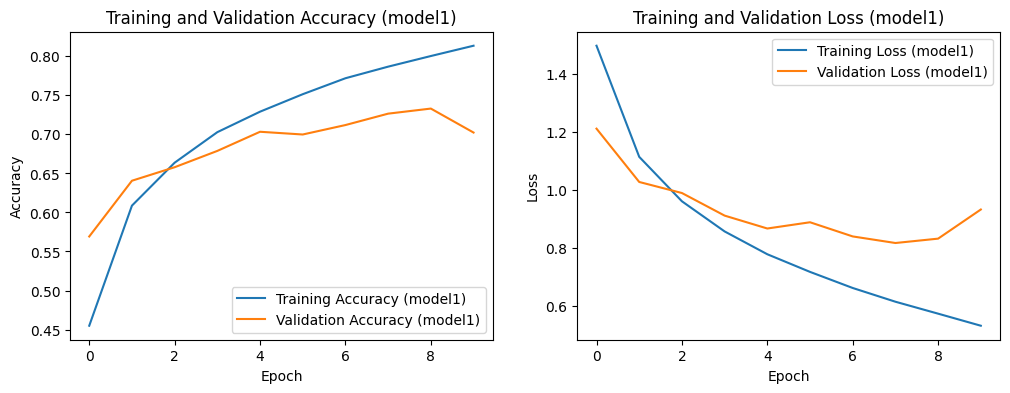

In [ ]:
# Plot accuracy for model1
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['accuracy'], label='Training Accuracy (model1)')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy (model1)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (model1)')
plt.legend()

# Plot loss for model1
plt.subplot(1, 2, 2)
plt.plot(results.history['loss'], label='Training Loss (model1)')
plt.plot(results.history['val_loss'], label='Validation Loss (model1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (model1)')
plt.legend()

plt.show()

# model1 with badding

In [ ]:
# try 64 filter with padding then try start with 128 filter

model_with_padding = Sequential()
model_with_padding.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) # 32*32*32
model_with_padding.add(MaxPooling2D((2, 2))) # 16*16*32
model_with_padding.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 16*16*64
model_with_padding.add(MaxPooling2D((2, 2))) # 8*8*64
model_with_padding.add(Conv2D(256, (3, 3), activation='relu', padding='same')) # 8*8*128
model_with_padding.add(MaxPooling2D((2, 2))) # 4*4*128
model_with_padding.add(Conv2D(512, (3, 3), activation='relu', padding='same')) # 4*4*256
model_with_padding.add(MaxPooling2D((2, 2))) # 2*2*256
model_with_padding.add(Flatten())
model_with_padding.add(Dense(64, activation='relu'))
model_with_padding.add(Dense(10, activation='softmax'))

model_with_padding.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,682,762 (6.42 MB)

 Trainable params: 1,682,762 (6.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_with_padding.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results_with_padding = model_with_padding.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3686 - loss: 1.6831 - val_accuracy: 0.6310 - val_loss: 1.0410
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6631 - loss: 0.9555 - val_accuracy: 0.7038 - val_loss: 0.8648
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7484 - loss: 0.7209 - val_accuracy: 0.7426 - val_loss: 0.7474
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8109 - loss: 0.5392 - val_accuracy: 0.7432 - val_loss: 0.7529
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8589 - loss: 0.4047 - val_accuracy: 0.7528 - val_loss: 0.7757
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8917 - loss: 0.3097 - val_accuracy: 0.7567 - val_loss: 0.8450
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9212 - loss: 0.2205 - val_accuracy: 0.7250 - val_loss: 1.0082
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9424 - loss: 

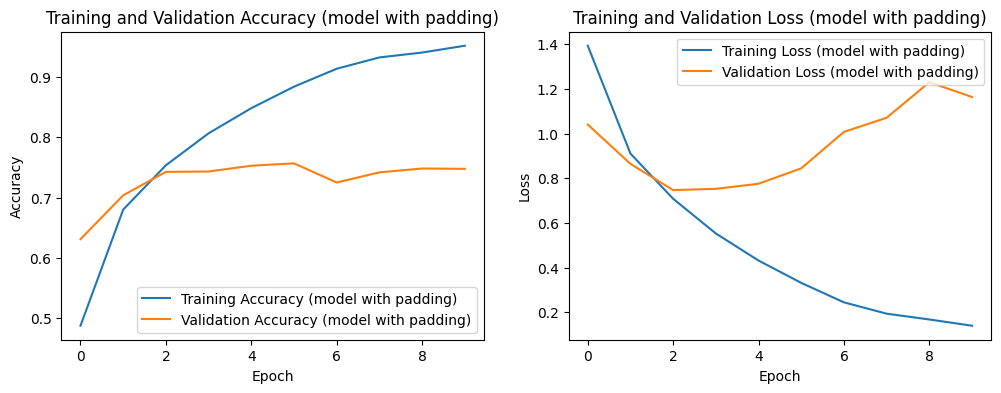

In [ ]:
# Plot accuracy for model with padding
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(results_with_padding.history['accuracy'], label='Training Accuracy (model with padding)')
plt.plot(results_with_padding.history['val_accuracy'], label='Validation Accuracy (model with padding)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (model with padding)')
plt.legend()

# Plot loss for model with padding
plt.subplot(1, 2, 2)
plt.plot(results_with_padding.history['loss'], label='Training Loss (model with padding)')
plt.plot(results_with_padding.history['val_loss'], label='Validation Loss (model with padding)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (model with padding)')
plt.legend()

plt.show()

We got higher acc in the first 10 epochs with padding than without so its better to add padding in small picture to captrue more features

# Model2 with padding and Dropout & Batch Normalization to reduce overfit

In [ ]:
# Dropout only in NN, BatchNormalization only before Dense Layer (Fully Conected Layer)
# If there is Underfit so try not to dropout in the conv layers

model2 = Sequential()
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) # with padding, 32*32*64
model2.add(MaxPooling2D((2, 2))) # 16*16*64
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 16*16*64
model2.add(MaxPooling2D((2, 2))) # 8*8*64
model2.add(Dropout(0.2))

model2.add(Conv2D(256, (3, 3), activation='relu', padding='same')) # 8*8*128
model2.add(MaxPooling2D((2, 2))) # 4*4*128
model2.add(Dropout(0.2))

model2.add(Conv2D(512, (3, 3), activation='relu', padding='same')) # 4*4*128
model2.add(MaxPooling2D((2, 2))) # 2*2*128
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(BatchNormalization()) #
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='softmax'))
model2.add(Dropout(0.2))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,690,954 (6.45 MB)

 Trainable params: 1,686,858 (6.43 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.2804 - loss: 4.5211 - val_accuracy: 0.4415 - val_loss: 1.8027
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.4279 - loss: 4.0516 - val_accuracy: 0.4150 - val_loss: 4.1705
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4652 - loss: 3.7762 - val_accuracy: 0.5110 - val_loss: 2.7446
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4938 - loss: 3.5309 - val_accuracy: 0.5846 - val_loss: 1.6805
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5160 - loss: 3.3677 - val_accuracy: 0.6266 - val_loss: 1.3849
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5304 - loss: 3.2745 - val_accuracy: 0.6068 - val_loss: 1.6714
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5316 - loss: 3.2618 - val_accuracy: 0.6244 - val_loss: 1.4564
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5433 - loss: 

NameError: name 'results2' is not defined

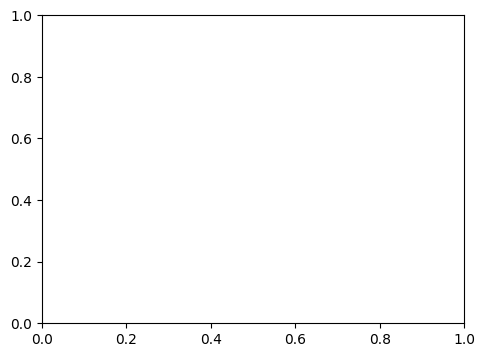

In [ ]:
# Plot accuracy for model2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(results2.history['accuracy'], label='Training Accuracy (model2)')
plt.plot(results2.history['val_accuracy'], label='Validation Accuracy (model2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (model2)')
plt.legend()

# Plot loss for model2
plt.subplot(1, 2, 2)
plt.plot(results2.history['loss'], label='Training Loss (model2)')
plt.plot(results2.history['val_loss'], label='Validation Loss (model2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (model2)')
plt.legend()

plt.show()

# Model3 with padding and Dropout & Batch Normalization to reduce overfit

In [ ]:
# Dropout only in NN, BatchNormalization only before Dense Layer (Fully Conected Layer)
# If there is Underfit so try not to dropout in the conv layers

model3 = Sequential()
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) # with padding, 32*32*128
model3.add(MaxPooling2D((2, 2))) # 16*16*128
#model3.add(Dropout(0.3))

model3.add(Conv2D(256, (3, 3), activation='relu', padding='same')) # 16*16*256
model3.add(MaxPooling2D((2, 2))) # 8*8*256
#model3.add(Dropout(0.3))

model3.add(Conv2D(512, (3, 3), activation='relu', padding='same')) # 8*8*512
model3.add(Conv2D(512, (3, 3), activation='relu', padding='same')) # 8*8*512
model3.add(MaxPooling2D((2, 2))) # 4*4*512
#model3.add(Dropout(0.3))

model3.add(Conv2D(256, (3, 3), activation='relu', padding='same')) # 4*4*256
model3.add(MaxPooling2D((2, 2))) # 2*2*256
#model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(BatchNormalization())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))

model3.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,552,650 (21.18 MB)

 Trainable params: 5,550,602 (21.17 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results3 = model3.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9223 - loss: 0.2297 - val_accuracy: 0.7534 - val_loss: 1.0157
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 21ms/step - accuracy: 0.9329 - loss: 0.1954 - val_accuracy: 0.7886 - val_loss: 0.9632
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9390 - loss: 0.1802 - val_accuracy: 0.7870 - val_loss: 1.0293
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9432 - loss: 0.1684 - val_accuracy: 0.7873 - val_loss: 0.9938
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9461 - loss: 0.1559 - val_accuracy: 0.7913 - val_loss: 1.0529
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9514 - loss: 0.1477 - val_accuracy: 0.7744 - val_loss: 1.2619
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9516 - loss: 0.1448 - val_accuracy: 0.7815 - val_loss: 1.1067
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9554 -

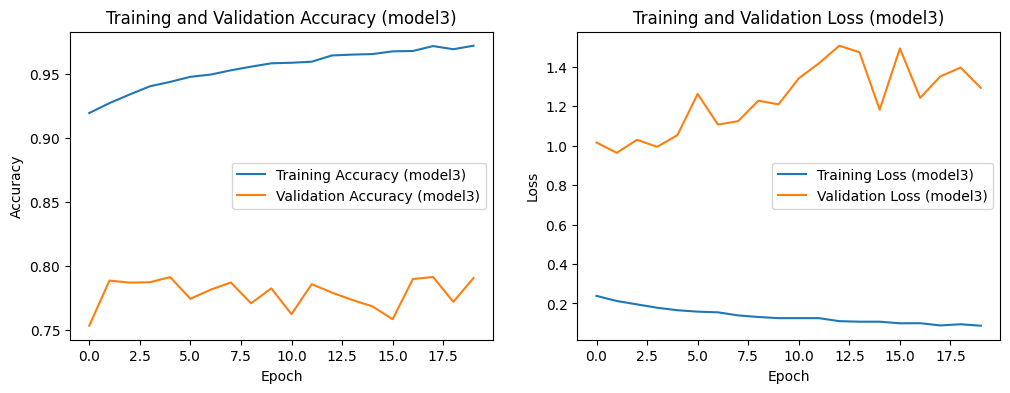

In [ ]:
# Plot accuracy for model3
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(results3.history['accuracy'], label='Training Accuracy (model3)')
plt.plot(results3.history['val_accuracy'], label='Validation Accuracy (model3)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (model3)')
plt.legend()

# Plot loss for model3
plt.subplot(1, 2, 2)
plt.plot(results3.history['loss'], label='Training Loss (model3)')
plt.plot(results3.history['val_loss'], label='Validation Loss (model3)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (model3)')
plt.legend()

plt.show()